In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge

from sklearn import linear_model

from sklearn.linear_model import ElasticNet

In [32]:
#Зчитуєсо датасет

avocado = pd.read_csv('avocado.csv')
print (avocado)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

In [33]:
#Викидаємо рядки заповнені NaN
avocado.dropna(inplace=True)
print(avocado)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

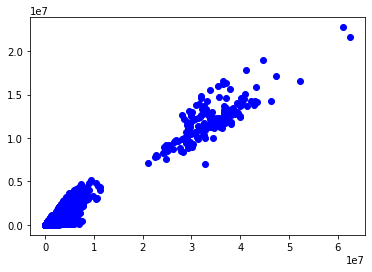

In [34]:
X = avocado['Total Volume']
Y = avocado['4046']

plt.plot(X, Y, 'o', color='blue')
plt.show()

In [35]:
#Пошук аномалій

avocado['Ratio'] = avocado['Total Volume']-avocado['4046']
print(avocado)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

In [36]:
#Метод 3-сігма

mean=np.mean(avocado['Ratio'])
sigma = np.std(avocado['Ratio'])
lim_low = mean - 3*sigma
lim_high = mean+3*sigma

print(mean)
print(sigma)
print(lim_low)
print(lim_high)

557635.5884782752
2232246.358491053
-6139103.486994883
7254374.663951434


In [37]:
avocado = avocado[(avocado["Ratio"] < lim_high) & (avocado["Ratio"] > lim_low)]
print(avocado)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

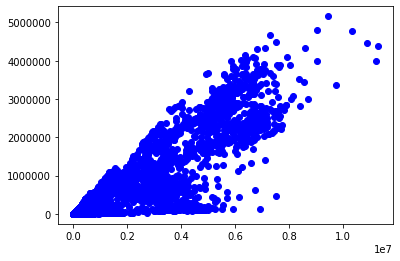

In [38]:
X = avocado['Total Volume']
Y = avocado['4046']

plt.plot(X, Y, 'o', color='blue')
plt.show()

(9039,) (9039,) (9039,) (9039,)
a =  [[0.37147099]]
b =  [-20767.99424921]
0.7992685445578244


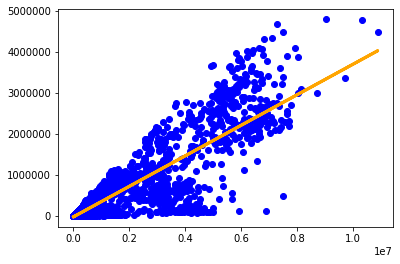

In [39]:
X = avocado['Total Volume']
Y = avocado['4046']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values.reshape(-1, 1)

regressor = LinearRegression().fit(X_train, Y_train)

b = regressor.intercept_
a = regressor.coef_
print('a = ', a)
print('b = ', b)


X_test = X_test.values.reshape(-1, 1)
y_pred = regressor.predict(X_test)
Y_test = Y_test.values.reshape(-1, 1)

predict=r2_score(Y_test, y_pred)
print(predict)

plt.plot(X_test, Y_test, 'o', color='blue')
plt.plot(X_test, y_pred, color='orange', linewidth=3.0)

plt.show()

(9039,) (9039,) (9039,) (9039,)
a =  [[0.37572506]]
b =  [-21340.75611066]
0.8007068786040248


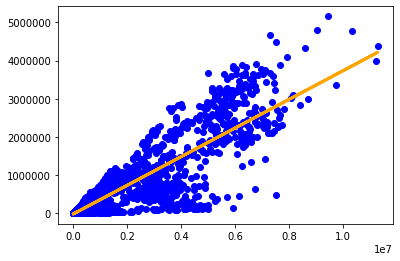

In [45]:
X = avocado['Total Volume']
Y = avocado['4046']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values.reshape(-1, 1)

clf = Ridge(alpha=1.0)
ringe = clf.fit(X_train, Y_train)

b = ringe.intercept_
a = ringe.coef_
print('a = ', a)
print('b = ', b)


X_test = X_test.values.reshape(-1, 1)
y_pred = ringe.predict(X_test)
Y_test = Y_test.values.reshape(-1, 1)

predict=r2_score(Y_test, y_pred)
print(predict)


plt.plot(X_test, Y_test, 'o', color='blue')
plt.plot(X_test, y_pred, color='orange', linewidth=3.0)

plt.show()

(9039,) (9039,) (9039,) (9039,)
a =  [0.36871006]
b =  [-19294.68297934]
0.8025898032034215


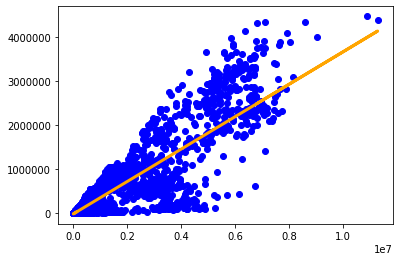

In [46]:
X = avocado['Total Volume']
Y = avocado['4046']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values.reshape(-1, 1)

clf = linear_model.Lasso(alpha=0.1)
lasso = clf.fit(X_train, Y_train)

b = lasso.intercept_
a = lasso.coef_
print('a = ', a)
print('b = ', b)


X_test = X_test.values.reshape(-1, 1)
y_pred = lasso.predict(X_test)
Y_test = Y_test.values.reshape(-1, 1)

predict=r2_score(Y_test, y_pred)
print(predict)

plt.plot(X_test, Y_test, 'o', color='blue')
plt.plot(X_test, y_pred, color='orange', linewidth=3.0)

plt.show()

(9039,) (9039,) (9039,) (9039,)
a =  [0.37723451]
b =  [-22771.39387461]
0.797450155644497


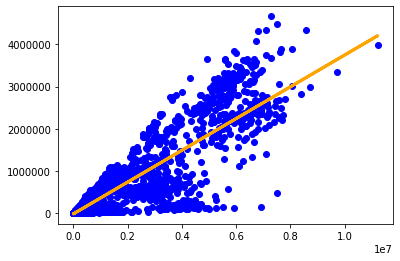

In [47]:
X = avocado['Total Volume']
Y = avocado['4046']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values.reshape(-1, 1)

regr = ElasticNet(random_state=0)
regr.fit(X_train, Y_train)

b = regr.intercept_
a = regr.coef_
print('a = ', a)
print('b = ', b)

X_test = X_test.values.reshape(-1, 1)
y_pred = regr.predict(X_test)
Y_test = Y_test.values.reshape(-1, 1)

predict=r2_score(Y_test, y_pred)
print(predict)

plt.plot(X_test, Y_test, 'o', color='blue')
plt.plot(X_test, y_pred, color='orange', linewidth=3.0)

plt.show()


(9039,) (9039,) (9039,) (9039,)
a =  [0.37638119]
b =  [-21336.46177362]
a2 =  [[0.37638119]]
b2 =  [-21336.46177388]
0.8047438118177305


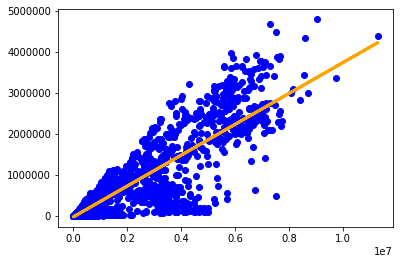

In [49]:
X = avocado['Total Volume']
Y = avocado['4046']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values.reshape(-1, 1)

regr = ElasticNet(random_state=0)
elas_net = regr.fit(X_train, Y_train)

b = regr.intercept_
a = regr.coef_
print('a = ', a)
print('b = ', b)

clf2 = Ridge(alpha=1.0)
ridge = clf2.fit(X_train, Y_train)

b2 = ridge.intercept_
a2 = ridge.coef_
print('a2 = ', a2)
print('b2 = ', b2)

X_test = X_test.values.reshape(-1, 1)
y_pred_elas_net = elas_net.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
Y_test = Y_test.values.reshape(-1, 1)

y_pred_lasso = y_pred_lasso.reshape(-1, 1)

zipped_list = zip(y_pred_elas_net, y_pred_ridge)
y_pred = [(x + y)/2 for (x, y) in zipped_list]

predict=r2_score(Y_test, y_pred)
print(predict)

plt.plot(X_test, Y_test, 'o', color='blue')
plt.plot(X_test, y_pred, color='orange', linewidth=3.0)

plt.show()